# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

**set up**

In [1]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"hilla464","key":"2ebc2419b9fbaf4902445878b377659b"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f database.sqlite -p ./datasets/us-baby-name/database.sqlite
!chdir ./datasets/us-baby-name/database.sqlite/
!unzip ./datasets/us-baby-name/database.sqlite/*.zip  -d ./datasets/us-baby-name/database.sqlite

!unzip ./datasets/us-baby-name/database.sqlite/*.zip  -d ./datasets/us-baby-name/database.sqlite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 89% 117M/131M [00:00<00:00, 161MB/s]
100% 131M/131M [00:00<00:00, 152MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/us-baby-name/database.sqlite/database.sqlite.zip
  inflating: ./datasets/us-baby-name/database.sqlite/database.sqlite  
Archive:  ./datasets/us-baby-name/database.sqlite/database.sqlite.zip
replace ./datasets/us-baby-name/database.sqlite/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/us-baby-name/database.sqlite/database.sqlite  


Loading

In [2]:
%load_ext sql

In [3]:
%%sql 
sqlite:///datasets/us-baby-name/database.sqlite/database.sqlite

'Connected: @datasets/us-baby-name/database.sqlite/database.sqlite'

creates Names table 

In [4]:
%%sql
DROP TABLE IF EXISTS Names;
CREATE TABLE Names (
    State TEXT,
    Gender TEXT,
    Name TEXT,
    Count INTEGER,
    Year INTEGER
);

 * sqlite:///datasets/us-baby-name/database.sqlite/database.sqlite
Done.
Done.


[]

 Batch inserts rows to Names StateNames

In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('./datasets/us-baby-name/database.sqlite/database.sqlite')

# Read the data from the StateNames table into a pandas dataframe
df = pd.read_sql_query("SELECT State, Gender, Name, Count, Year FROM StateNames", con=conn)

cur = conn.cursor()

rows = [row for row in df.itertuples(index=False)]

cur.executemany("INSERT INTO Names (State, Gender, Name, Count, Year) VALUES (?, ?, ?, ?, ?)", rows)

conn.commit()
conn.close()

In [6]:
%sql SELECT * FROM Names LIMIT 1;

 * sqlite:///datasets/us-baby-name/database.sqlite/database.sqlite
Done.


[('AK', 'F', 'Mary', 14, 1910)]

**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

Query to run

In [7]:
%%sql 
SELECT State, Gender, 
       COUNT(*) AS NumYears, 
       SUM(Count) AS TotalCount, 
       MIN(Count) AS MinCount, 
       MAX(Count) AS MaxCount, 
       AVG(Count) AS AvgCount
FROM Names
WHERE Name = 'Mary'
GROUP BY State, Gender
LIMIT 5

 * sqlite:///datasets/us-baby-name/database.sqlite/database.sqlite
Done.


[('AK', 'F', 105, 3936, 6, 99, 37.48571428571429),
 ('AL', 'F', 105, 115370, 112, 2694, 1098.7619047619048),
 ('AL', 'M', 50, 519, 5, 26, 10.38),
 ('AR', 'F', 105, 58520, 33, 1403, 557.3333333333334),
 ('AR', 'M', 24, 159, 5, 12, 6.625)]

In [8]:
def msr_query(conn,query):
      # Measure the query execution time
    time = timeit.timeit(lambda: conn.execute(query).fetchall(), number=1)

    # Print the query execution time
    print(f"Query execution time: {time:.6f} seconds")


In [9]:
import sqlite3
import timeit

conn = sqlite3.connect('./datasets/us-baby-name/database.sqlite/database.sqlite')
# Define the query
query = """
SELECT State, Gender, 
       COUNT(*) AS NumYears, 
       SUM(Count) AS TotalCount, 
       MIN(Count) AS MinCount, 
       MAX(Count) AS MaxCount, 
       AVG(Count) AS AvgCount
FROM Names
WHERE Name = 'Mary'
GROUP BY State, Gender
"""


In [10]:
msr_query(conn,query)

Query execution time: 0.409268 seconds


In [11]:
%sql CREATE INDEX idx_name ON Names (Name);


 * sqlite:///datasets/us-baby-name/database.sqlite/database.sqlite
Done.


[]

In [12]:
msr_query(conn,query)

Query execution time: 0.020212 seconds


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **Question = <YOUR_ID> mod 4 +1**) </span>

In [13]:
# which question to answer - put your ID number and run the code 
your_id  = "208953083"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 4


***Question 1:*** Write a function that returns how many *female and* male babies were born in a given state in a given year.
Use it to calculate the number of babies born in WA in 2000 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1850 and 1950  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in CA in 1999 (10pt)

**Question 4:** Write a function that returns how many male babies named _Robert_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 1950 (10pt)

In [14]:
def count_roberts_by_state_year(state, year):
    conn = sqlite3.connect('./datasets/us-baby-name/database.sqlite/database.sqlite')
    cursor = conn.cursor()
    query = f"SELECT SUM(Count) FROM Names WHERE Name='Robert' AND Gender='M' AND State='{state}' AND Year={year}"
    cursor.execute(query)
    count = cursor.fetchone()[0]
    conn.close()
    return count

In [15]:
import sqlite3
conn = sqlite3.connect('./datasets/us-baby-name/database.sqlite/database.sqlite')
cursor = conn.cursor()
all_states = cursor.execute("SELECT DISTINCT State FROM Names").fetchall()
all_states = [state[0] for state in all_states]
max_count = 0
max_state = ""
for state in all_states:
    count = count_roberts_by_state_year(state, 1950)
    if count > max_count:
        max_count = count
        max_state = state

print(f"The state with the highest number of male babies named Robert in 1950 is {max_state}, with a count of {max_count}")


The state with the highest number of male babies named Robert in 1950 is NY, with a count of 8622


**Question (for everyone):** For the state of CA write code that calculates the third most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [16]:
# Define the query
query = """
SELECT *,
    (Year - Year % 10) AS Decade
FROM Names
WHERE State = 'CA'
"""

In [17]:
ca_plus_decade = pd.read_sql_query(query, conn)

In [18]:
ca_plus_decade.head()

State Gender      Name  Count  Year  Decade
0    CA      F      Mary    295  1910    1910
1    CA      F     Helen    239  1910    1910
2    CA      F   Dorothy    220  1910    1910
3    CA      F  Margaret    163  1910    1910
4    CA      F   Frances    134  1910    1910

In [19]:
import matplotlib.pyplot as plt

def third_most_popular(gender,df):
    # First, filter the dataframe to include only female names
    df_t = df[df['Gender'] == gender]

    # Then, group the dataframe by decade and Name, and sum the Count values for each group
    df_t_grouped = df_t.groupby(['Decade', 'Name'])['Count'].sum().reset_index()

    # Next, sort the dataframe by Decade and Count, in descending order
    df_t_sorted = df_t_grouped.sort_values(['Decade', 'Count'], ascending=[True, False])

    # Finally, use the `groupby` method again to group the dataframe by Decade, and select the third highest Count value for each group
    df_t_third = df_t_sorted.groupby('Decade').nth(2)

    # Print the resulting dataframe
    print(df_t_third)

    return df_t_third

def visulize(df):
  # Create a stacked bar chart of the counts for each name and decade
  df.plot(kind='bar', stacked=True, colormap='Paired')

  # Set the chart title and axis labels
  plt.title('Third Most Popular Names by Decade')
  plt.xlabel('Decade')
  plt.ylabel('Count')

  # Show the chart
  plt.show()



third most popular female name for each decade:
            Name  Count
Decade                 
1910       Helen   4713
1920     Barbara  10402
1930    Patricia  11215
1940    Patricia  24561
1950        Mary  33472
1960       Karen  24003
1970        Lisa  21587
1980      Ashley  29561
1990    Jennifer  29783
2000    Samantha  24039
2010         Mia  11861


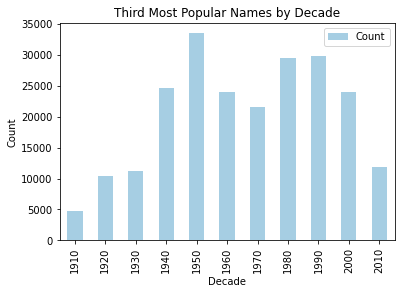

In [20]:
print("third most popular female name for each decade:")
df_t_third=third_most_popular('F',ca_plus_decade)
visulize(df_t_third)

third most popular male name for each decade:
           Name  Count
Decade                
1910    William   6786
1920    William  14529
1930       John  16811
1940      James  37697
1950      David  65516
1960       John  63235
1970      Jason  43082
1980      David  51605
1990       Jose  46306
2000      Jacob  32418
2010     Jayden  13001


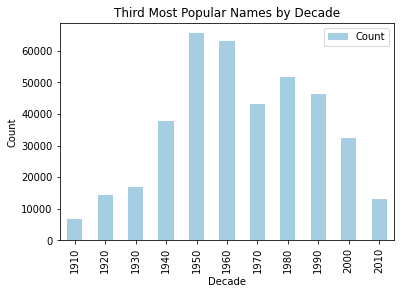

In [21]:
print("third most popular male name for each decade:")
df_t_third=third_most_popular('M',ca_plus_decade)
visulize(df_t_third)

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Ecuador' (15pt)

In [22]:
# Creating a dataset directory
!mkdir ./datasets/choco-flavors

# download the dataset from Kaggle and unzip it
!kaggle datasets download rombikuboktaeder/choco-flavors  -p ./datasets/choco-flavors
!chdir ./datasets/choco-flavors
!unzip  ./datasets/choco-flavors/*.zip  -d ./datasets/choco-flavors/

  0% 0.00/30.3k [00:00<?, ?B/s]
100% 30.3k/30.3k [00:00<00:00, 5.72MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/choco-flavors/choco-flavors.zip
  inflating: ./datasets/choco-flavors/flavors_of_cacao.csv  


In [23]:
colnames=['Company', 'Specific_Bean_Origin_Or_Bar_Name', 'REF', 'Review_Date','Cocoa_Percent','Company_Location','Rating','Bean_Type','Broad_Bean_Origin'] 

df = pd.read_csv('./datasets/choco-flavors/flavors_of_cacao.csv')
# Replace the column names with new names
df.columns = colnames

df.head()

Company Specific_Bean_Origin_Or_Bar_Name   REF  Review_Date Cocoa_Percent  \
0  A. Morin                      Agua Grande  1876         2016           63%   
1  A. Morin                            Kpime  1676         2015           70%   
2  A. Morin                           Atsane  1676         2015           70%   
3  A. Morin                            Akata  1680         2015           70%   
4  A. Morin                           Quilla  1704         2015           70%   

  Company_Location  Rating Bean_Type Broad_Bean_Origin  
0           France    3.75                    Sao Tome  
1           France    2.75                        Togo  
2           France    3.00                        Togo  
3           France    3.50                        Togo  
4           France    3.50                        Peru

In [24]:
import pandas as pd

def count_bars_by_origin(origin,df):
    # Filter the dataset to include only bars with the given origin
    origin_df = df[df['Broad_Bean_Origin'] == origin]

    # Return the number of bars with the given origin
    return len(origin_df)

ecuador_count = count_bars_by_origin('Ecuador',df)
print(ecuador_count)

193


**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

In [25]:
def get_cocoa_stats_by_country(country,df):
    df['Cocoa_Percent'] = pd.to_numeric(df['Cocoa_Percent'].str.replace('%', ''))

    # Filter the dataset to include only bars manufactured by companies in the given country
    country_df = df[df['Company_Location'] == country]

    # Calculate the maximal and average cocoa percentages for bars manufactured by companies in the given country
    max_cocoa = country_df['Cocoa_Percent'].max()
    avg_cocoa = country_df['Cocoa_Percent'].mean()

    # Return the maximal and average cocoa percentages
    return max_cocoa, avg_cocoa

swiss_max_cocoa, swiss_avg_cocoa = get_cocoa_stats_by_country('Switzerland',df)
print(swiss_max_cocoa, swiss_avg_cocoa)

88.0 71.21052631578948


**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

In [26]:
# Get a series of bean type counts in descending order
bean_counts = df['Bean_Type'].value_counts()

# Get the second most common bean count
second_count = bean_counts.iloc[1]

# Get all bean types with the same count as the second most common bean type
second_most_common = bean_counts[bean_counts == second_count].index.tolist()

# Get the rarest bean count
rarest_count = bean_counts.iloc[-1]

# Get all bean types with the same count as the rarest bean type
rarest = bean_counts[bean_counts == rarest_count].index.tolist()

# Print the results
print('Second most common bean type(s):', second_most_common)
print('Most rare bean type(s):', rarest)

Second most common bean type(s): ['Trinitario']
Most rare bean type(s): ['Criollo (Ocumare)', 'Criollo (Ocumare 67)', 'Trinitario, TCGA', 'Trinitario (Amelonado)', 'Trinitario, Nacional', 'Forastero (Amelonado)', 'Forastero, Trinitario', 'Forastero (Arriba) ASSS', 'Forastero(Arriba, CCN)', 'Criollo, +', 'Criollo (Wild)', 'Trinitario (Scavina)', 'Criollo (Ocumare 77)', 'CCN51', 'Amazon', 'Blend-Forastero,Criollo']


**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

In [27]:
# Group by year and calculate the number of reviews and average rating
by_year = df.groupby('Review_Date').agg({'Review_Date': 'count', 'Rating': 'mean'})
by_year.columns = ['Number of Reviews', 'Average Rating']

# Print the result
print(by_year)

             Number of Reviews  Average Rating
Review_Date                                   
2006                        72        3.125000
2007                        77        3.162338
2008                        93        2.994624
2009                       123        3.073171
2010                       111        3.148649
2011                       165        3.256061
2012                       195        3.178205
2013                       184        3.197011
2014                       247        3.189271
2015                       285        3.246491
2016                       219        3.226027
2017                        24        3.312500


In [28]:
# Group by year and company and calculate the number of reviews and average rating
by_year_company = df.groupby(['Review_Date', 'Company']).agg({'Review_Date': 'count', 'Rating': 'mean'})
by_year_company.columns = ['Number of Reviews', 'Average Rating']

# Print the result
print(by_year_company)


                                    Number of Reviews  Average Rating
Review_Date Company                                                  
2006        Amedei                                  2        4.500000
            Bonnat                                  7        3.464286
            Cote d' Or (Kraft)                      1        1.000000
            Dolfin (Belcolade)                      1        1.500000
            Domori                                  3        3.250000
...                                               ...             ...
2017        Madre                                   1        3.500000
            Smooth Chocolator, The                  1        3.500000
            Soul                                    6        3.375000
            Spencer                                 3        3.333333
            Xocolla                                 2        2.625000

[728 rows x 2 columns]


# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [29]:
!pip install pony
# Creating a dataset directory
!mkdir ./datasets/kickstarter-projects

# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects  -p ./datasets/kickstarter-projects
!chdir ./datasets/kickstarter-projects
!unzip  ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 KB 7.0 MB/s eta 0:00:00
 90% 33.0M/36.8M [00:00<00:00, 173MB/s]
100% 36.8M/36.8M [00:00<00:00, 170MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/kickstarter-projects/kickstarter-projects.zip
  inflating: ./datasets/kickstarter-projects/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter-projects/ks-projects-201801.csv  


In [30]:
import pandas as pd
import csv
from pony.orm import *
# Creating a new database
db = Database()
db.bind(provider='sqlite', filename='/content/datasets/kickstarter-projects/kickstarter.db', create_db=True) 

class Kickstarter1(db.Entity):
    ID = PrimaryKey(int, auto=True)
    name = Optional(str)
    category = Optional(str)
    main_category = Optional(str)
    currency = Optional(str)
    deadline = Optional(str)
    goal = Optional(float)
    launched = Optional(str)
    pledged = Optional(float)
    state = Optional(str)
    backers = Optional(int)
    country = Optional(str)
    usd_pledged = Optional(float)

class Kickstarter2(db.Entity):
    ID = PrimaryKey(int, auto=True)
    name = Optional(str)
    category = Optional(str)
    main_category = Optional(str)
    currency = Optional(str)
    deadline = Optional(str)
    goal = Optional(float)
    launched = Optional(str)
    pledged = Optional(float)
    state = Optional(str)
    backers = Optional(int)
    country = Optional(str)
    usd_pledged = Optional(float)
    usd_pledged_real = Optional(float)
    usd_goal_real = Optional(float)


In [31]:
set_sql_debug(True)
db.generate_mapping(create_tables=True)

In [32]:
#prep the data 
df1 = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201612.csv',encoding='cp1252',usecols=lambda column: column not in ['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'])
df1.columns = df1.columns.str.strip() 
df1.columns = df1.columns.str.replace(' ', '_')
df2 = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv')
df2.columns = df2.columns.str.strip() 
df2.columns = df2.columns.str.replace(' ', '_')

In [33]:
@db_session
def load_dataframe(df, entity_class):
    invalid_rows = []
    for _, row in df.iterrows():
        try:
            entity = entity_class(
                name=str(row['name']),
                category=row['category'],
                main_category=row['main_category'],
                currency=row['currency'],
                deadline=row['deadline'],
                goal=float(row['goal']),
                launched=row['launched'],
                pledged=row['pledged'],
                state=row['state'],
                backers=row['backers'],
                country=row['country'],
                usd_pledged=row['usd_pledged']
            )

            if entity_class == Kickstarter2:
                entity.usd_pledged_real = row['usd_pledged_real']
                entity.usd_goal_real = row['usd_goal_real']
        except ValueError:
            invalid_rows.append(row)
            continue
        
    return invalid_rows

errs = load_dataframe(df1, Kickstarter1)
errs = errs + load_dataframe(df2, Kickstarter2)

db.commit()

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [83]:
# which question to answer - put your ID number and run the code 
your_id  = "208953083"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

In [34]:
from collections import Counter
from datetime import datetime
@db_session
def find_month_with_highest_number_of_projects(entity_class):
    # Retrieve all projects from the database
    projects = select(p for p in entity_class)[:]

    # Extract the month from the 'launched' column for each project
    months = [datetime.strptime(p.launched, '%Y-%m-%d %H:%M:%S').strftime('%B') for p in projects]

    # Count the number of projects launched in each month
    month_counts = Counter(months)

    # Find the month with the highest number of projects
    most_common_month, num_projects = month_counts.most_common(1)[0]

    return most_common_month, num_projects

print("for ks-projects-201612 month_with_highest_number_of_projects is:" + str(find_month_with_highest_number_of_projects(Kickstarter1)))
print("for ks-projects-201801 month_with_highest_number_of_projects is:" + str(find_month_with_highest_number_of_projects(Kickstarter2)))

for ks-projects-201612 month_with_highest_number_of_projects is:('July', 32084)
for ks-projects-201801 month_with_highest_number_of_projects is:('July', 36367)


## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [35]:
# Creating a dataset directory
!mkdir ./datasets/academy-awards

# download the dataset from Kaggle and unzip it
!kaggle datasets download theacademy/academy-awards  -p ./datasets/academy-awards
!chdir ./datasets/academy-awards
!unzip  ./datasets/academy-awards/*.zip  -d ./datasets/academy-awards/

  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 86.3MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/academy-awards/academy-awards.zip
  inflating: ./datasets/academy-awards/database.csv  


In [36]:
oscars = pd.read_csv('./datasets/academy-awards/database.csv')
oscars.columns

Index(['Year', 'Ceremony', 'Award', 'Winner', 'Name', 'Film'], dtype='object')

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

In [37]:
nominations_by_film = oscars.groupby('Film')['Year'].nunique().to_dict()

top_10_films_by_nominations = dict(sorted(nominations_by_film.items(), key=lambda x: x[1], reverse=True)[:10])

print("Top-10 movies with the highest number of Oscar nominations:")
for i, (film, nominations) in enumerate(top_10_films_by_nominations.items()):
    print(f"{i+1}. {film}: {nominations} nominations")


Top-10 movies with the highest number of Oscar nominations:
1. France: 36 nominations
2. John Williams: 33 nominations
3. Walt Disney, Producer: 31 nominations
4. Italy: 27 nominations
5. Alfred Newman: 20 nominations
6. Metro-Goldwyn-Mayer: 20 nominations
7. Spain: 19 nominations
8. Warner Brothers: 18 nominations
9. Edith Head: 17 nominations
10. Jerry Goldsmith: 16 nominations


**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5.  Cool Bonus: LLMs & Stable Difussion (10pt)

Using GPT-2 (or any other LLM model), create a simple code that generates a bedtime story with 10-page of related images.

In [ ]:
!pip install transformers scipy ftfy accelerate
!pip install diffusers==0.11.1

In [78]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')


In [87]:
# Set the story prompt
prompt = "once upon a time there was a beautiful princess"

input_ids = tokenizer.encode(prompt, return_tensors='pt')
output = model.generate(input_ids, max_length=500,  no_repeat_ngram_size=2, early_stopping=True,top_k=10) 
text=tokenizer.decode(output[0],skip_special_tokens=True)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


once upon a time there was a beautiful princess, and she was so beautiful, that she could not be seen.

"I am sorry, but I am not going to be able to see you again."
...
,
:
The Princess of the Forest, the Princesses of Love, The Princesss of Death, And the Prince of Darkness. The Prince is the King of all the kingdoms, who is also the Queen of Heaven. He is a great man, a man who has been called the Lord of All. His name is called "The Prince." He has the power to change the world, to destroy the evil that is in the hearts of men, so that they may live in peace and happiness. And he is known as the "Prince of Light." The "King of Evil." And his name was called The King. In the beginning, he was the king of darkness, of evil, evil. But he has changed the darkness and the light, because he knows that the dark is not good, for it is evil and it does not know what it wants. It is afraid of light and of dark, which is good and evil; and he will not let darkness be the enemy of good. So he 

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Token indices sequence length is longer than the specified maximum sequence length for this model (492 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['kingdoms, who is also the queen of heaven. he is a great man, a man who has been called the lord of all. his name is called " the prince." he has the power to change the world, to destroy the evil that is in the hearts of men, so that they may live in peace and happiness. and he is known as the " prince of light." the " king of evil." and his name was called the king. in the beginning, he was the king of darkness, of evil, evil. but he has changed the darkness and the light, because he knows that the dark is not good, for it is evil and it does not know what it wants. it

  0%|          | 0/50 [00:00<?, ?it/s]

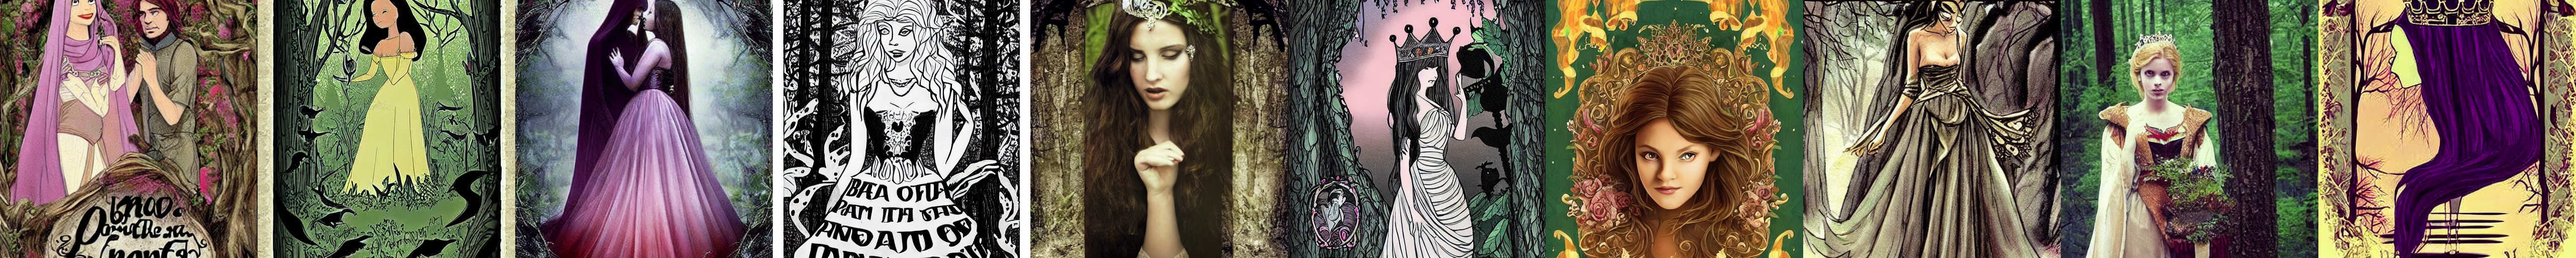

In [88]:
from PIL import Image
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_images = 10
prompt = [text] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=10)
grid
